# More insights from Facebook Page's data that Facebook Page Insight doesn't tell you
----

Facebook Page Insights is the first stop tool for all of Facebook page admin to analyze and measure the performance of the content posted / published on the page. The tool itself provides lot of useful metrics out of the book which is quite necessary for the Page admin to do analysis. However, one of the feature that seems to be not talked about much over the internet base on my search is about how to make use of the raw data behind those metrics that can be exported.

As I'm currently running my online comics page with 55k Page Like for many years (https://facebook.com/manudglom), I have confusion many times on which metrics should I really move it's needle to increase the total page's like. Is it a set of 'Like, Comment, Share'? or Is it actually just 'Share'? With the average performance of my content, how can I predict the growth of the page?

With these curious in mind, it drives me to extract the data and do some analysis to answer my top 3 important questions as listed below.

1. What are the factors that influence new daily page like?
2. What are the approximated value of factors that influences the page like?
3. How can we predict daily page like when there is a new post published?

## Step 1 Gather Data from Facebook Page Insight. 

There are 2 type of the data available for extract which are *Page level* and *Post level*. 

Unfortunately, the oldest for Page level data that is allowed to extract is 180 from today date. So, I extract all of them to have the most data point as I can. 

While on the post level, it has 180 days period limitation per one extraction. So, I tried to extract for about 2 years for this attempt. The reason for 2 years (2018-2019) data is that Facebook newsfeed has major algorithm change on January 2018 (https://blog.hootsuite.com/facebook-algorithm/). So, I avoid the data older than that as it has risk to influence the result based on out dated facebook's algorithm.

## Step 2 Assess - Load and Explore data

### 2.1 Post level data
We have 6 files. Each file has all of post data within 180 days period. We have 2 years in total.

In [3]:
# Libaries area
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import datetime

# Set configuration to display all columns in Jupyter Notebook
pd.set_option('display.max_columns', None)

In [5]:
# Read the exported data which is in CSV data
df1 = pd.read_csv('2019-1.csv')
# Drop the first row as it is the column's description
df1.drop(axis=1,index=0,inplace=True)

df2 = pd.read_csv('2019-2.csv')
df2.drop(axis=1,index=0,inplace=True)

df3 = pd.read_csv('2019-3.csv')
df3.drop(axis=1,index=0,inplace=True)

df4 = pd.read_csv('2018-1.csv')
df4.drop(axis=1,index=0,inplace=True)

df5 = pd.read_csv('2018-2.csv')
df5.drop(axis=1,index=0,inplace=True)

df6 = pd.read_csv('2018-3.csv')
df6.drop(axis=1,index=0,inplace=True)

# Quickly check the number of row, the list of columns and its type
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 50 columns):
Post ID                                                                        9 non-null object
Permalink                                                                      9 non-null object
Post Message                                                                   9 non-null object
Type                                                                           9 non-null object
Countries                                                                      0 non-null float64
Languages                                                                      0 non-null float64
Posted                                                                         9 non-null object
Audience Targeting                                                             9 non-null object
Lifetime Post Total Reach                                                      9 non-null object
Lifetime Post organic re

After I check the data format from info(), I found that all of them has the same columns. So, I append them to be one dataframe and explore the data type and null value further.

In [8]:
# View initial data after append
df=df1.append([df2, df3, df4, df5, df6])
df.head()

,Audience Targeting,Countries,Languages,Lifetime Average time video viewed,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions by Type - link clicks,Lifetime Matched Audience Targeting Consumptions by Type - other clicks,Lifetime Matched Audience Targeting Consumptions by Type - photo view,Lifetime Matched Audience Targeting Consumptions by Type - video play,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback,Lifetime Negative Feedback by Type - hide_all_clicks,Lifetime Negative Feedback by Type - hide_clicks,Lifetime Negative Feedback by Type - unlike_page_clicks,Lifetime Negative Feedback from Users,Lifetime Negative Feedback from Users by Type - hide_all_clicks,Lifetime Negative Feedback from Users by Type - hide_clicks,Lifetime Negative Feedback from Users by Type - unlike_page_clicks,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Paid reach of a post by people who like your Page,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime People who have liked your Page and engaged with your post,Lifetime Post Audience Targeting Unique Consumptions by Type - link clicks,Lifetime Post Audience Targeting Unique Consumptions by Type - other clicks,Lifetime Post Audience Targeting Unique Consumptions by Type - photo view,Lifetime Post Audience Targeting Unique Consumptions by Type - video play,Lifetime Post Impressions by people who have liked your Page,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Post Paid Reach,Lifetime Post Stories by action type - comment,Lifetime Post Stories by action type - like,Lifetime Post Stories by action type - share,Lifetime Post Total Impressions,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post reach by people who like your Page,Lifetime Talking About This (Post) by action type - comment,Lifetime Talking About This (Post) by action type - like,Lifetime Talking About This (Post) by action type - share,Lifetime Video length,Permalink,Post ID,Post Message,Posted,Type
1,,NaN,NaN,0,3006,2933,9.0,1442,2998.0,NaN,4449,4,2,1,NaN,3,2,2,NaN,0,0,0,0,0,0,0,0,0,2678,9.0,700,2803.0,NaN,23635,28393,0,0,0,58.0,462.0,33,28393,13743,13743,10566,31.0,436.0,33,0,https://www.facebook.com/manudglom/posts/23749...,168610896491236_2374967322522238,หายไปคิดคอนเท้นต์บันเทิงแฝงสาระมาครับ\nก็เลยมา...,03/17/2019 04:15:45 AM,Photo
2,,NaN,NaN,0,5600,5341,68.0,6777,1589.0,NaN,8434,2,2,NaN,NaN,2,2,NaN,NaN,0,0,0,0,0,0,0,0,0,2831,68.0,4469,1495.0,NaN,24154,61951,0,0,0,287.0,849.0,114,61951,37851,37851,14993,142.0,803.0,111,0,https://www.facebook.com/manudglom/posts/23437...,168610896491236_2343726995646271,ข่าวคบซ้อนมาแรงสร้างความกังวลให้เหล่าแม่บ้าน\n...,02/24/2019 03:00:07 AM,Photo
3,,NaN,NaN,0,617,516,471.0,113,NaN,NaN,584,1,1,NaN,NaN,1,1,NaN,NaN,0,0,0,0,0,0,0,0,0,600,469.0,100,NaN,NaN,8193,8877,0,0,0,8.0,162.0,7,8877,6244,6244,5827,5.0,161.0,7,0,https://www.facebook.com/manudglom/posts/23285...,168610896491236_2328527450499559,มัดรวมตอนสั้นสำหรับคนที่พลาด\nเปี่ยมไปด้วยสาระ...,02/15/2019 02:14:22 AM,Link
4,,NaN,NaN,0,2501,2279,24.0,2083,924.0,NaN,3031,6,2,4,NaN,6,2,4,NaN,0,0,0,0,0,0,0,0,0,2385,24.0,1655,923.0,NaN,21918,24064,0,0,0,71.0,463.0,8,24064,16082,16082,14689,41.0,463.0,8,0,https://www.facebook.com/manudglom/posts/23185...,168610896491236_2318538521498452,หากท่านสงสัยว่าลูกอึแต่มือไม่ว่างที่จะเช็คเพิส...,02/10/2019 03:30:05 AM,Photo
5,,NaN,NaN,0,4684,4523,7.0,1803,4168.0,NaN,5978,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,4349,7.0,1402,3873.0,NaN,17852,23102,0,0,0,80.0,762.0,39,23102,15583,15583,12386,42.0,619.0,38,0,https://www.facebook.com/manudglom/posts/23058...,168610896491236_2305869456098692,หน้ากากอนามัยสองชิ้นกันฝุ่นได้ดีพอตัว\nแค่คุณต...,02/01/2019 0

In [44]:
# Check the column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 24
Data columns (total 54 columns):
Audience Targeting                                                             100 non-null object
Countries                                                                      0 non-null float64
Languages                                                                      0 non-null float64
Lifetime Average time video viewed                                             100 non-null object
Lifetime Engaged Users                                                         100 non-null object
Lifetime Matched Audience Targeting Consumers on Post                          100 non-null object
Lifetime Matched Audience Targeting Consumptions by Type - link clicks         78 non-null float64
Lifetime Matched Audience Targeting Consumptions by Type - other clicks        97 non-null object
Lifetime Matched Audience Targeting Consumptions by Type - photo view          78 non-null float64
Lifetime

In [9]:
# Check null value
df.isnull().sum()

Audience Targeting                                                               0
Countries                                                                      100
Languages                                                                      100
Lifetime Average time video viewed                                               0
Lifetime Engaged Users                                                           0
Lifetime Matched Audience Targeting Consumers on Post                            0
Lifetime Matched Audience Targeting Consumptions by Type - link clicks          22
Lifetime Matched Audience Targeting Consumptions by Type - other clicks          3
Lifetime Matched Audience Targeting Consumptions by Type - photo view           22
Lifetime Matched Audience Targeting Consumptions by Type - video play           99
Lifetime Matched Audience Targeting Consumptions on Post                         0
Lifetime Negative Feedback                                                       0
Life

### 2.2 Page level data

For page level data, we have just only 180 days backward from today per facebook's limitaion.

In [10]:
df_page = pd.read_csv('Page 2020.csv')
# Drop the first row as it is the column's description
df_page.drop(axis=1,index=0,inplace=True)
df_page.info()
df_page.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 146
Columns: 2060 entries, Date to Weekly Total web site click count per Page by age and gender - UNKNOWN.U
dtypes: float64(1858), object(202)
memory usage: 2.3+ MB


Date                                                                         0
Lifetime Total Likes                                                         0
Daily New Likes                                                             36
Daily Unlikes                                                                9
Daily Page Engaged Users                                                     1
                                                                            ..
Weekly Total web site click count per Page by age and gender - &lt;13.M      0
Weekly Total web site click count per Page by age and gender - &lt;13.U      0
Weekly Total web site click count per Page by age and gender - UNKNOWN.F     0
Weekly Total web site click count per Page by age and gender - UNKNOWN.M     0
Weekly Total web site click count per Page by age and gender - UNKNOWN.U     0
Length: 2060, dtype: int64

In [11]:
# Check example of data
df_page.head()

Date Lifetime Total Likes Daily New Likes Daily Unlikes  \
1  2019-08-31                55011               2             2   
2  2019-09-01                55006               1             6   
3  2019-09-02                55002               2             5   
4  2019-09-03                54997             NaN             5   
5  2019-09-04                54998               3             2   

  Daily Page Engaged Users Weekly Page Engaged Users  \
1                        3                        72   
2                        3                        32   
3                        3                        26   
4                     3131                      3140   
5                     2549                      5641   

  28 Days Page Engaged Users Daily Total Reach Weekly Total Reach  \
1                       5856                30                420   
2                       5842                25                242   
3                       5840                18                202   
4                       6791              8788               9027   
5                       7799              8729              17428   

  28 Days Total Reach Daily Organic Reach Weekly Organic Reach  \
1               27709                  26                  398   
2               27689                  17                  216   
3               27650                  17                  177   
4               26918                8776                 8975   
5               27438                8677                17323   

  28 Days Organic Reach Daily Paid Reach Weekly Paid Reach 28 Days Paid Reach  \
1                 27678              NaN               NaN                NaN   
2                 27642              NaN               NaN                NaN   
3                 27604              NaN               NaN                NaN   
4                 26882              NaN               NaN                NaN   
5                 27394              NaN               NaN                NaN   

  Daily Viral Reach Weekly Viral Reach 28 Days Viral Reach  \
1                20                217                5635   
2                15                172                5597   
3                14                147                5556   
4               538                658                5482   
5              2093               2656                6158   

  Daily Total Impressions Weekly Total Impressions 28 Days Total Impressions  \
1                      36                      670                     77591   
2                     123                      530                     77559   
3                      36                      484                     77445   
4                   12703                    13138                     74675   
5                   12661                    25730                     75972   

  Daily Organic impressions Weekly Organic impressions  \
1                        30                        583   
2                       106                        438   
3                        32                        408   
4                     12551                      12920   
5                     12509                      25378   

  28 Days Organic impressions Daily Paid Impressions Weekly Paid Impressions  \
1                       75975                    NaN                     NaN   
2                       75947                    NaN                     NaN   
3                       75847                    NaN                     NaN   
4                       73268                    NaN                     NaN   
5                       74682                    NaN                     NaN   

  28 Days Paid Impressions Daily Viral impressions Weekly Viral impressions  \
1                      NaN                      23                      264   
2                      NaN                      18                      212   
3                      NaN                 

## Step 3 Cleaning

The data is obviously not in the format that is ready to use. These are list of cleaning that we will do:

3.1 For post level data, some of columns aren't related to this analysis. Looking at definition https://www.socialmediaexaminer.com/analyze-facebook-metrics/ and rename the column. For example, countries and languages because I puclish the content in Thai only. Also, the VDO related columns won't be used as well because my content is picture-
based.

3.2 The data is stored as number but the type is object. So, I'll convert them first.

3.3 For page level data, it has thousonds of columns which we will use just only the key one which are around Total Page Like, Daily Like, Impression, Reach, Viral and Engaged etc.

3.4 For null data it can be simply filled with 0, this is because all of them base on Facebook tracking tool and we can assumed that it doesn't has data or the post doesn't perform in that aspect.

In [12]:
# 3.1 Remove unused column
df=df.drop(['Lifetime Negative Feedback by Type - unlike_page_clicks', 'Countries', 'Languages', 'Lifetime Post Audience Targeting Unique Consumptions by Type - video play', 'Lifetime Negative Feedback from Users by Type - unlike_page_clicks','Lifetime Post Audience Targeting Unique Consumptions by Type - video play','Lifetime Matched Audience Targeting Consumptions by Type - video play'],axis=1)

In [19]:
# These are for Post level data
# 3.1 (cont) Rename some lengthy column name and convert data type from object to numeric
df=df.rename(columns={
    'Lifetime Engaged Users' : 'Total Engaged Users',
    'Lifetime People who have liked your Page and engaged with your post' : 'Engage by Fan',
    'Lifetime Post Impressions by people who have liked your Page' : 'Impression to Fan',
    'Lifetime Post Organic Impressions' : 'Total Impression', 
    'Lifetime Post Stories by action type - comment' : 'Stories by comment',
    'Lifetime Post Stories by action type - like' : 'Stories by Like',
    'Lifetime Post Stories by action type - share' : 'Stories by Share',
    'Lifetime Post reach by people who like your Page' : 'Reach to Fan',
    'Lifetime Post organic reach' : 'Total Reach',
    'Lifetime Talking About This (Post) by action type - comment' : 'Viral from Comment',
    'Lifetime Talking About This (Post) by action type - like' : 'Viral from like',
    'Lifetime Talking About This (Post) by action type - share' : 'Viral from share'
})

# 3.2 convert data type from object to numeric
df['Total Engaged Users'] = pd.to_numeric(df['Total Engaged Users'])
df['Engage by Fan'] = pd.to_numeric(df['Engage by Fan'])
df['Total Reach'] = pd.to_numeric(df['Total Reach'])
df['Reach to Fan'] = pd.to_numeric(df['Reach to Fan'])
df['Viral from share'] = pd.to_numeric(df['Viral from share'])
df['Stories by Share'] = pd.to_numeric(df['Stories by Share'])
df['Total Impression'] = pd.to_numeric(df['Total Impression'])
df['Impression to Fan'] = pd.to_numeric(df['Impression to Fan'])
df['Lifetime Post Total Impressions'] = pd.to_numeric(df['Lifetime Post Total Impressions'])
df['Lifetime Post Audience Targeting Unique Consumptions by Type - other clicks'] = pd.to_numeric(df['Lifetime Post Audience Targeting Unique Consumptions by Type - other clicks'])
df['Lifetime Post Total Reach'] = pd.to_numeric(df['Lifetime Post Total Reach'])
df['Posted'] = pd.to_datetime(df['Posted'])

# For date and time of the post, I separate to day of week, hour and min of the post which might have some degree of correlation
df['Posted_DayInWeek'] = [d.weekday() for d in df['Posted']]
df['Posted_Hour'] = [d.hour for d in df['Posted']]
df['Posted_Min'] =  [d.minute for d in df['Posted']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 24
Data columns (total 51 columns):
Audience Targeting                                                             100 non-null object
Lifetime Average time video viewed                                             100 non-null object
Total Engaged Users                                                            100 non-null int64
Lifetime Matched Audience Targeting Consumers on Post                          100 non-null object
Lifetime Matched Audience Targeting Consumptions by Type - link clicks         78 non-null float64
Lifetime Matched Audience Targeting Consumptions by Type - other clicks        97 non-null object
Lifetime Matched Audience Targeting Consumptions by Type - photo view          78 non-null float64
Lifetime Matched Audience Targeting Consumptions on Post                       100 non-null object
Lifetime Negative Feedback                                                     100 non-null object
Lifetim

In [18]:
# These are for Page level data
# 3.3 Select only the column related with Daily New Likes
df_page_r = df_page[['Date',
 'Lifetime Total Likes',
 'Daily New Likes',
 'Daily Unlikes',
 'Daily Page Engaged Users',
 'Daily Total Reach',
 'Daily Organic Reach',
 'Daily Viral Reach',
 'Daily Total Impressions',
 'Daily Reach Of Page Posts',
 'Daily Total Impressions of your posts',
 'Daily Total Consumers',
 'Daily Page Consumptions'
                   ]]
# Convert all data to number. Except the date.
# Copy df_page_r to df_page_r_date as I'll drop non-numeric column like 'Date' so that I can use pd.to_numeric on the DataFrame
df_page_r_date = df_page_r
df_page_r = df_page_r.drop(['Date','Lifetime Total Likes'],axis=1)
df_page_r = df_page_r.apply(pd.to_numeric)

# 3.4 Fill Null with 0
df_page_r = df_page_r.fillna(0)

# Check the result
df_page_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 146
Data columns (total 11 columns):
Daily New Likes                          146 non-null float64
Daily Unlikes                            146 non-null float64
Daily Page Engaged Users                 146 non-null float64
Daily Total Reach                        146 non-null int64
Daily Organic Reach                      146 non-null int64
Daily Viral Reach                        146 non-null int64
Daily Total Impressions                  146 non-null int64
Daily Reach Of Page Posts                146 non-null int64
Daily Total Impressions of your posts    146 non-null int64
Daily Total Consumers                    146 non-null float64
Daily Page Consumptions                  146 non-null float64
dtypes: float64(5), int64(6)
memory usage: 13.7 KB


## Step 4 - Modeling & Visualization

Now, the data is ready for modeling and visualization to answer each question.

### Question 1 : What are the factors that influence new daily page like?

I'll use DataFrame's correlation function to see how each columns at page level data correlate each other.
The result is visualized with Seaborn's heatmap as it offers customization of colors and size.

The focus is on the column that correlates with **Daily New Likes**.

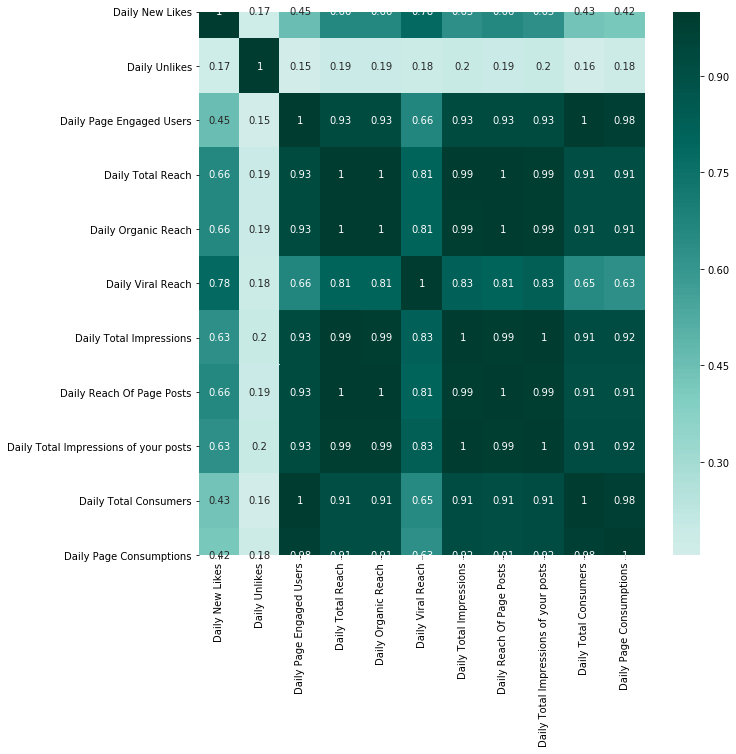

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_page_r.corr(), center=0, cmap='BrBG', annot=True)

##### Summary of observations #####

- **Daily new like** highly correlates with **Daily Viral Reach** at 0.78
- Other correlated factors are *Reach* and *Impressions* at 0.66 and 0.63
- Other observable insights
   - *Daily unlike* doesn't has much correlation with anythings here since everythings is below 0.2
   - Ultimately, **Daily Viral Reach** correlates with **Reach** and **Impressions** at 0.81
   
##### Page & Post level analysis #####

Since we also have Post level data that is also listed by date, we can join both Page and Post data with its posted date and date to see the relationship and how the metrics at post level correlate with page level.

So, I'll join both data using page level date and post level's post date as key, convert additional columns's data type to number as necessary. Finally, I'll use correlation function and visualize it with heatmap to see the result.

In [20]:
# convert data type of post level's  and page level
df_page_r_date['Date'] = pd.to_datetime(df_page_r_date['Date'])
df['Posted Date'] = [pd.to_datetime(d.date()) for d in df['Posted']]

# bing only necessary data from page level. I don't include Daily Reach of Page Posts and Total Impression because it is already part of the post level data
df_page_like = df_page_r_date[['Date','Lifetime Total Likes', 'Daily New Likes', 'Daily Viral Reach']]
df_merge = pd.merge(df,df_page_like, left_on='Posted Date', right_on='Date', how='left')

# since page level has only the data for last 6 months while post level has 2 years, I drop all of the post level data that doesn't has page level data.
df_merge.dropna(subset=['Lifetime Total Likes'],inplace=True)

# convert data to make it ready for correlation calculation
df_merge['Lifetime Total Likes'] = pd.to_numeric(df_merge['Lifetime Total Likes'])
df_merge['Daily New Likes'] = pd.to_numeric(df_merge['Daily New Likes'])
df_merge['Daily Viral Reach'] = pd.to_numeric(df_merge['Daily Viral Reach'])

# Check the result
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 29 to 42
Data columns (total 56 columns):
Audience Targeting                                                             14 non-null object
Lifetime Average time video viewed                                             14 non-null object
Total Engaged Users                                                            14 non-null int64
Lifetime Matched Audience Targeting Consumers on Post                          14 non-null object
Lifetime Matched Audience Targeting Consumptions by Type - link clicks         10 non-null float64
Lifetime Matched Audience Targeting Consumptions by Type - other clicks        14 non-null object
Lifetime Matched Audience Targeting Consumptions by Type - photo view          14 non-null float64
Lifetime Matched Audience Targeting Consumptions on Post                       14 non-null object
Lifetime Negative Feedback                                                     14 non-null object
Lifetime Nega

C:\Users\Pathompong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


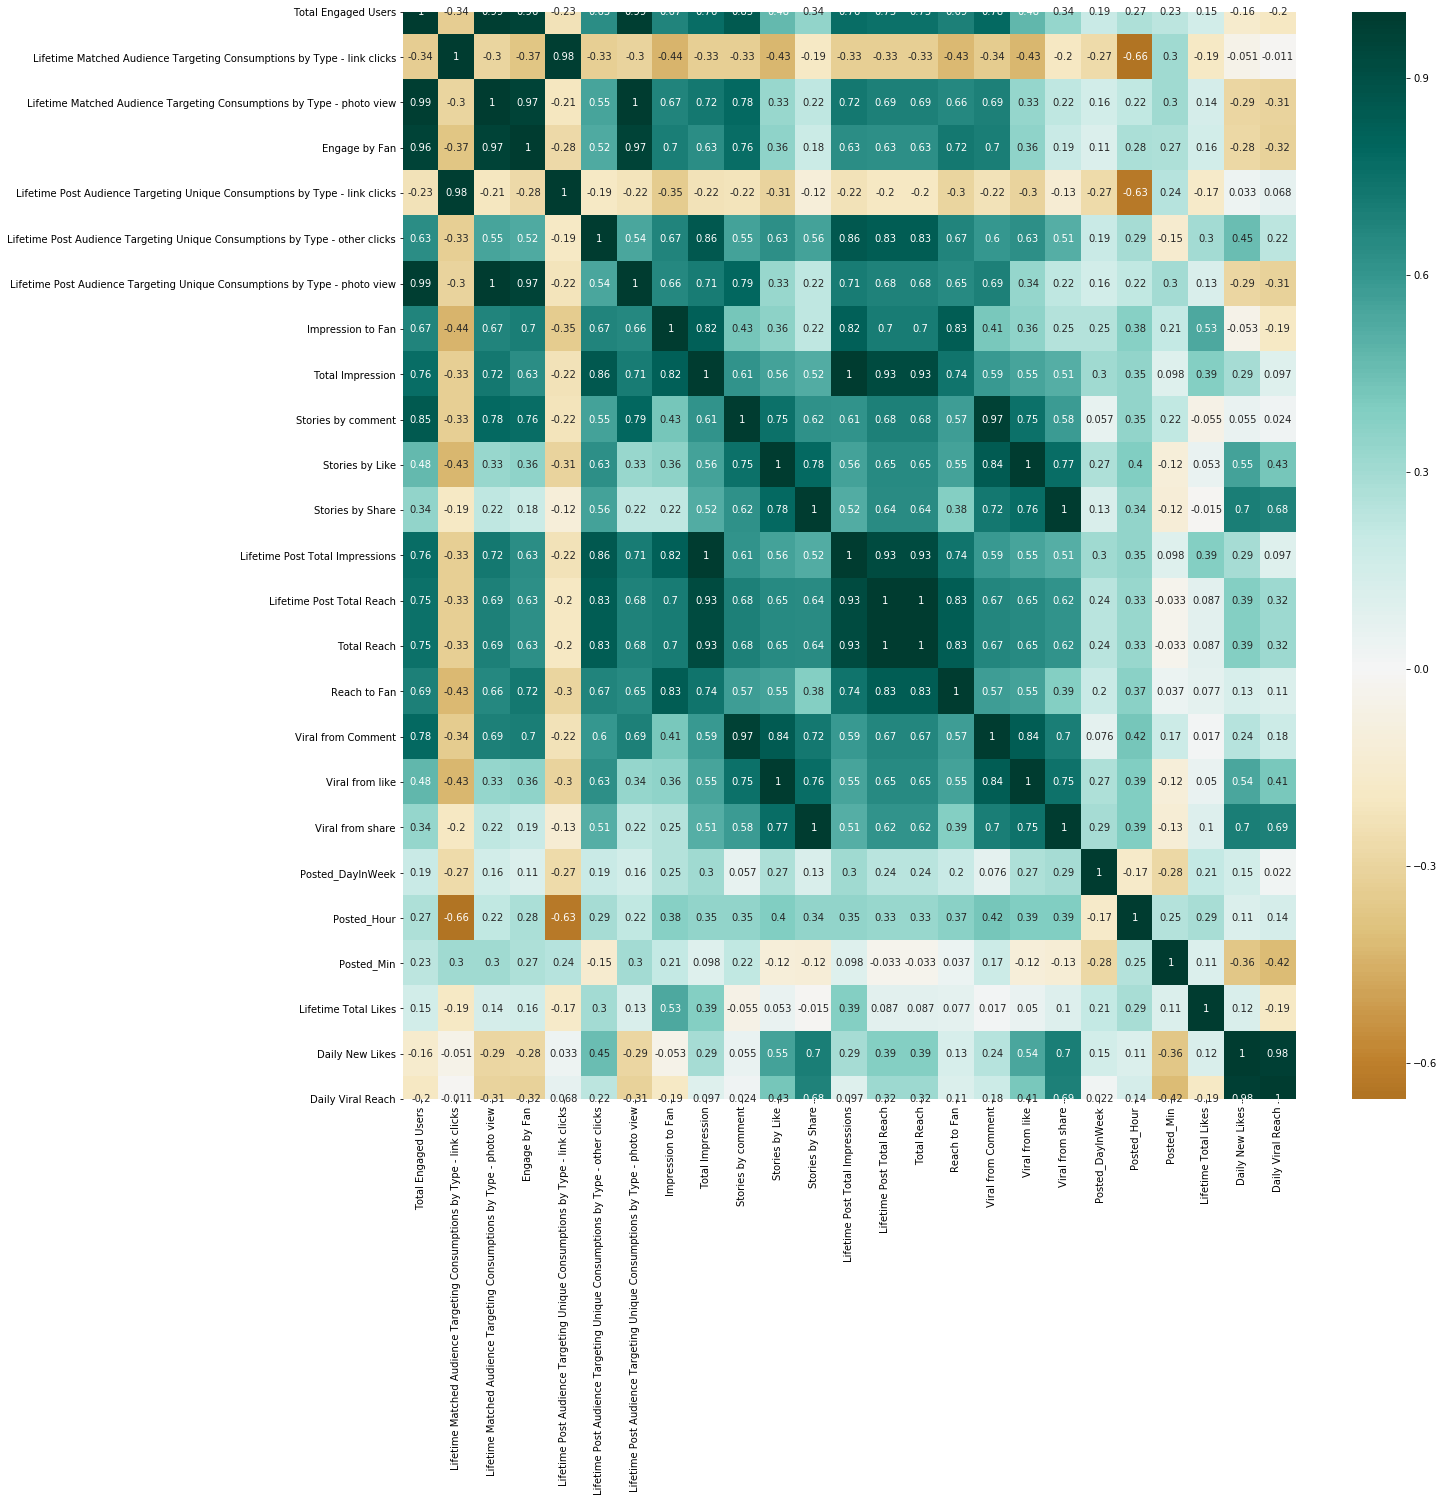

In [21]:
# Use the same Seaborn's heatmap to see 
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_merge.corr(), center=0, cmap='BrBG', annot=True)

With this combined heatmap, we can conclude the answer of this question as:

- ***Daily New Likes*** correlates the most with ***Daily Viral Reach***
- ***Daily Viral Reach*** correlates the most with ***the Post's number of share and like***
- ***Reach*** and ***Impression*** also correlates with ***Daily Viral Reach*** and also directly correlates with ***Daily New Likes***
- ***Any user's click on the post*** (other clicks) correlates the most with ***Reach*** and ***Impression***


Based on this insights, the action that I should taken to growth fan page like further are focusing on engaging the user with the post content. 

The desired user's interaction at minimum is any click on the post. It is better, if the user like and the best with share.
The undesired behaviour is just read (or even not read) and scroll pass it without any interaction.

***Other interesting insights***
- *Total Page Like* doesn't has much correlation with anythings aside from *Impression to Fan* at only 0.53
- *Total Page Like* doesn't correlate with any interaction (photo view, link click, like or share)
- *Comment* does has some correlation with *Daily New Likes* indirectly but it isn't as much as *Like* or *Share*.
- The post's *Day of Week* and the *Hour* of post has small correlation with other key factors at 0.3



### Question 2 : What are the approximated value of each post's factors that influences the page like? ###

To answer this question, I'll use descriptive statistics and visualization with histogram or boxplot to help draw summary.
Base on the previous questions, the factors that will be included are ***Share, Like, Impression, Reach and Other clicks***.

In [22]:
df1 = df[['Posted Date','Stories by Like', 'Stories by Share', 'Total Impression', 'Total Reach', 'Lifetime Post Audience Targeting Unique Consumptions by Type - other clicks']]
df1.describe()

,Stories by Like,Stories by Share,Total Impression,Total Reach,Lifetime Post Audience Targeting Unique Consumptions by Type - other clicks
count,100.000000,96.000000,100.000000,100.000000,97.000000
mean,474.580000,24.843750,20265.790000,13983.360000,1116.113402
std,340.829593,30.645109,13982.388482,9283.105653,840.710487
min,38.000000,1.000000,0.000000,0.000000,77.000000
25%,249.000000,7.000000,11547.000000,8250.750000,488.000000
50%,413.500000,13.000000,17386.000000,12081.500000,977.000000
75%,596.250000,33.000000,24867.500000,18009.750000,1565.000000
max,2349.000000,165.000000,81268.000000,55269.000000,4469.000000


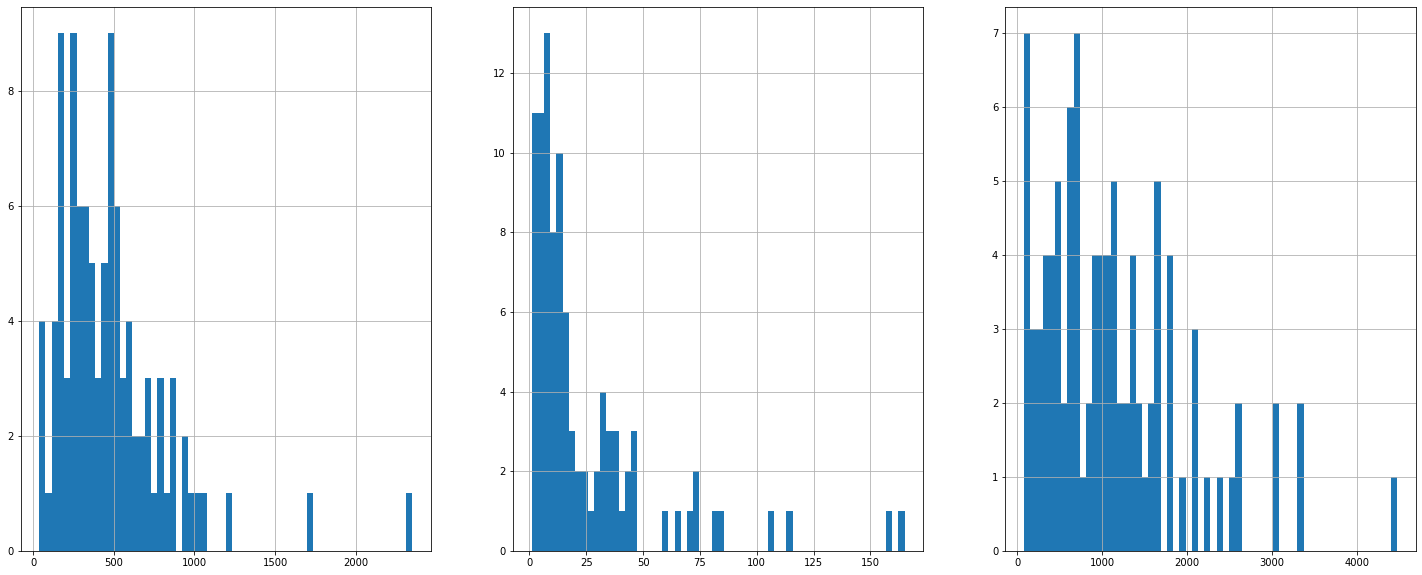

In [78]:
# Use histogram to see symmetry of distribution
f, axes = plt.subplots(1, 3)
df1['Stories by Like'].hist(bins=60, ax=axes[0], figsize=(25,10))
df1['Stories by Share'].hist(bins=60, ax=axes[1])
df1['Lifetime Post Audience Targeting Unique Consumptions by Type - other clicks'].hist(bins=60, ax=axes[2])

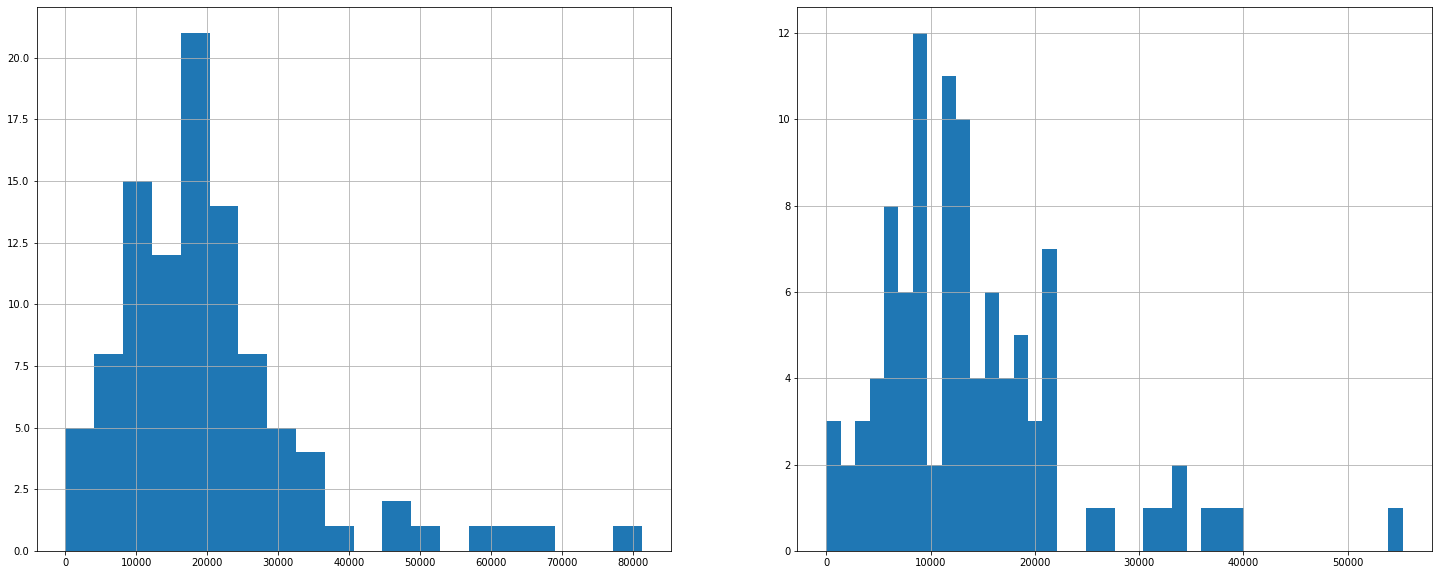

In [75]:
f, axes = plt.subplots(1, 2)
df1['Total Impression'].hist(bins=20, ax=axes[0], figsize=(25,10))
df1['Total Reach'].hist(bins=40, ax=axes[1])

In summary, the approximated factors value that influence page like are:

1. Like         : 38 - 1,000
2. Share        : 1  - 40
3. Other Clicks : 77 - 2,000
4. Impression   : 0  - 40,000
5. Reach        : 0  - 25,000

These number can be used as base line to measure and guide the quality of content. The more close or exceed the upper bound is the better.

### Question 3 : How can we predict daily page like when there is a new post published?

To answer, I'll try to build predictive model with linear regression. The ideal dataset should be the ***df_merge*** which has post level data and page level data. Unfortunately, the datapoint is very low at 14 due to data limitation at page level.

So, I decide to predict the factor that has the highest correlation with new page like which is ***Share*** instead.

I have tried with different set of independant variables and found that this set yield the best result based on r-square.

In [101]:
# X represent the independants variable. The set below is the best set as I tried
X = df[['Total Impression', 'Stories by Like']]
y = df['Stories by Share']

# Remove null by filling them with 0
X=X.fillna(0)
y=y.fillna(0)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# Train the model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.8523800815849778 on 30 values.'

By using this model, I can predict the baseline of my post share with error around 15%.

In [102]:
data = {'Total Impression':[11500],
        'Stories by Like':[250]
       }
X_test2 = pd.DataFrame(data)
y_test2 = lm_model.predict(X_test2)
y_test2

array([6.27235918])

In [106]:
data = {'Total Impression':[11000],
        'Stories by Like':[533]
       }
X_test2 = pd.DataFrame(data)
y_test2 = lm_model.predict(X_test2)
y_test2

array([19.30277386])

I also tries with page level data to predice Daily New Likes directly and seems like linear regression is not a good model for this data set as r-square is lower than 80%.

In [109]:
X = df_page_r[['Daily Page Engaged Users', 'Daily Viral Reach', 'Daily Total Impressions of your posts', 'Daily Total Reach', 'Daily Organic Reach', 'Daily Total Impressions', 'Daily Reach Of Page Posts']]
y = df_page_r['Daily New Likes']

X=X.fillna(0)
y=y.fillna(0)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.764623628878949 on 44 values.'

## Summary

> 1. What are the factors that influence new daily page like?
- Increment of the page's "Daily Viral Reach" is the most correlated with "Daily Page Like". 
- To increase "Daily Viral Reach" at Post level, we should influence the user to do "Share or Like" and "Click at any places in the post e.g. comment, link, view photo, expand comment section etc. (rather than just slide, stop and slide to next content)". 
- Ideally, the page admin should also boost the post to increase "Total Reach" which will also influence Daily Viral Reach.

> 2. What are the approximated value of factors that influences the page like?
Factors | lower-upper bound
:---|:---
Like | 38 - 1,000
Share | 1 - 40
Other Clicks | 77 - 2,000
Impression | 0 - 40,000
Reach | 0 - 25,000

These number can be used as base line to measure and guide the quality of content. 
Exceeding the upper bound is the better.

> How can we predict daily page like when there is a new post published?
- We can't predict directly now due to low datapoint of page & post combined.
- However, we can predict "Share" from "Like" and "Impression" using linear regression with 85% R-Square.
- Linear regression can't be used to predict Daily New Like at page level data as the best R-Square is lower than 80%. Other predictive model should be considered.